In [ ]:
""" After looking and searching too long
Now it is time to finally get a nice plot """

In [ ]:
""" first get the correct data (x, y, z) """

In [1]:
import rioxarray

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

In [2]:
address = "antwerpsestraat 165 2640 mortsel"

In [73]:
def get_address_data_from_geopunt(address: str) -> Dict[str, str]:
    data = requests.get(f"https://loc.geopunt.be/v4/Location?q={address}").json()
#    print(data,"\n")
    info = {'address' : address, 
                'x_value' : data['LocationResult'][0]['Location']['X_Lambert72'],
                'y_value' : data['LocationResult'][0]['Location']['Y_Lambert72'],
                'street' : data['LocationResult'][0]['Thoroughfarename'],
                'house_number' : data['LocationResult'][0]['Housenumber'], 
                'postcode': data['LocationResult'][0]['Zipcode'], 
                'municipality' : data['LocationResult'][0]['Municipality']}
    
    detail = requests.get("https://api.basisregisters.vlaanderen.be/v1/adresmatch", 
                          params={"postcode": info['postcode'], 
                                  "straatnaam": info['street'],
                                  "huisnummer": info['house_number']}).json()
    building = requests.get(detail['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
    build = requests.get(building['gebouw']['detail']).json()
    info['polygon'] = [build['geometriePolygoon']['polygon']]
#    print(info['polygon'][0]['coordinates'][0])
#    print(info['polygon'][1]['coordinates'][1])
    
    
    return info

In [74]:
address_info = get_address_data_from_geopunt(address)
address_info

{'address': 'antwerpsestraat 165 2640 mortsel',
 'x_value': 154972.19,
 'y_value': 207166.52,
 'street': 'Antwerpsestraat',
 'house_number': '165',
 'postcode': '2640',
 'municipality': 'Mortsel',
 'polygon': [{'coordinates': [[[154979.7968786955, 207171.46696180478],
     [154975.09499069303, 207174.41300980747],
     [154964.84225468338, 207161.90420979634],
     [154968.2011666894, 207158.72904179618],
     [154968.62727868557, 207159.14683379605],
     [154969.22977469116, 207158.676049795],
     [154979.7968786955, 207171.46696180478]]],
   'type': 'Polygon'}]}

In [75]:

# get the polygon coordinates in a x and a y list
poly = address_info["polygon"]
coords = poly[0]["coordinates"]

x_arr = []
y_arr = []

for i in range(len(coords)):
    lst = coords[i]

for j in range(len(lst)):
    x_arr.append(lst[j][0])
    y_arr.append(lst[j][1])

x_arr = np.array(x_arr)
y_arr = np.array(y_arr)

print("x: ", x_arr)
print("y: ", y_arr)  

x:  [154979.7968787  154975.09499069 154964.84225468 154968.20116669
 154968.62727869 154969.22977469 154979.7968787 ]
y:  [207171.4669618  207174.41300981 207161.9042098  207158.7290418
 207159.1468338  207158.6760498  207171.4669618 ]


In [76]:
# get the max and min coordinates from the polygon for 
# in order to calculate the relative coordinates for the box
xLeft = int(x_arr.min())
yBottom = int(y_arr.min())
xRight = int(x_arr.max())
yTop = int(y_arr.max())
print(xLeft, yBottom, xRight, yTop)

154964 207158 154979 207174


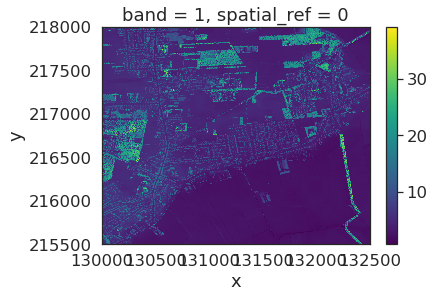

In [77]:
# exercise to find out if cropping and plotting works
# create a raw cropped_img of the DSM tiff map
dem_pre_path = 'data/DHMVIIDSMRAS1m_k15/GeoTIFF/DHMVIIDSMRAS1m_k15.tif'

dsm_pre_arr = rxr.open_rasterio(dem_pre_path)
cropped_img = dsm_pre_arr[:, 0:2500, 0:2500]

cropped_img.plot()
plt.show()
#cropped_img_address = dsm_pre_arr[:, 81281:81813, 95400:95850]

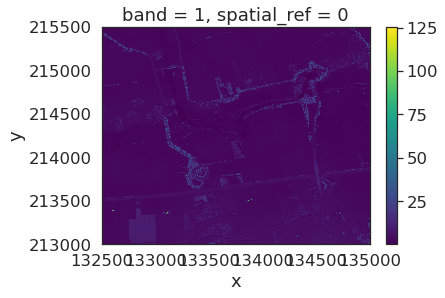

In [78]:
# exercise to find out if cropping and plotting works
# create a raw cropped_img of the DSM tiff map
dem_pre_path = 'data/DHMVIIDSMRAS1m_k15/GeoTIFF/DHMVIIDSMRAS1m_k15.tif'

dsm_pre_arr = rxr.open_rasterio(dem_pre_path)
cropped_img = dsm_pre_arr[:, 2500:5000, 2500:5000]

cropped_img.plot()
plt.show()
#cropped_img_address = dsm_pre_arr[:, 81281:81813, 95400:95850]

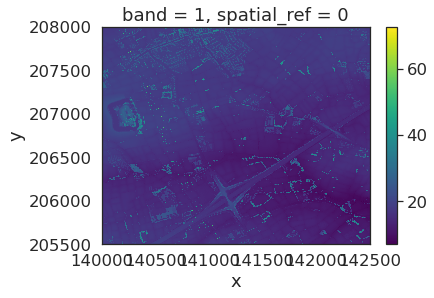

In [79]:
# exercise to find out if cropping and plotting works
# create a raw cropped_img of the DSM tiff map
dem_pre_path = 'data/DHMVIIDSMRAS1m_k15/GeoTIFF/DHMVIIDSMRAS1m_k15.tif'

dsm_pre_arr = rxr.open_rasterio(dem_pre_path)
cropped_img = dsm_pre_arr[:, 10000:12500, 10000:12500]

cropped_img.plot()
plt.show()
#cropped_img_address = dsm_pre_arr[:, 81281:81813, 95400:95850]

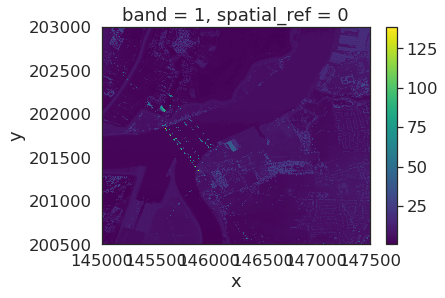

In [80]:
# exercise to find out if cropping and plotting works
# create a raw cropped_img of the DSM tiff map
dem_pre_path = 'data/DHMVIIDSMRAS1m_k15/GeoTIFF/DHMVIIDSMRAS1m_k15.tif'

dsm_pre_arr = rxr.open_rasterio(dem_pre_path)
cropped_img = dsm_pre_arr[:, 15000:17500, 15000:17500]

cropped_img.plot()
plt.show()
#cropped_img_address = dsm_pre_arr[:, 81281:81813, 95400:95850]

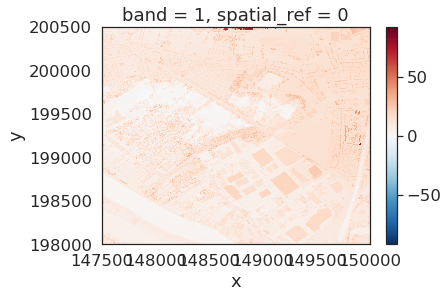

' FOR THIS TIF, X AND Y CANNOT EXCEED 20000 '

In [81]:
# exercise to find out if cropping and plotting works
# create a raw cropped_img of the DSM tiff map
dem_pre_path = 'data/DHMVIIDSMRAS1m_k15/GeoTIFF/DHMVIIDSMRAS1m_k15.tif'

dsm_pre_arr = rxr.open_rasterio(dem_pre_path)
cropped_img = dsm_pre_arr[:, 17500:20000, 17500:20000]

cropped_img.plot()
plt.show()
#cropped_img_address = dsm_pre_arr[:, 81281:81813, 95400:95850]

""" FOR THIS TIF, X AND Y CANNOT EXCEED 20000 """

<AxesSubplot:>

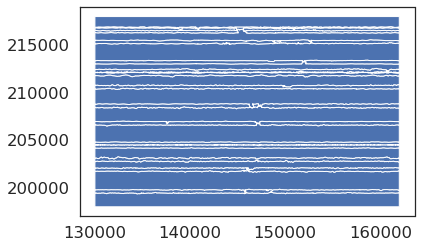

In [97]:
""" For the coordinates try:
the actual (absolute) coordinates minus the tif's bounderies.. left"""

import rioxarray
import geopandas as gpd
surface_HARV = rioxarray.open_rasterio('data/DHMVIIDSMRAS1m_k15/GeoTIFF/DHMVIIDSMRAS1m_k15.tif')
#print(surface_HARV.min())
#print(surface_HARV.max())
aoi_boundary_HARV = gpd.read_file("data/DHMVIIDSMRAS1m_k15/DHMVII_vdc_k15.shp")
#print(aoi_boundary_HARV)

aoi_boundary_HARV.plot()
#aoi_boundary_HARV.crs

<AxesSubplot:>

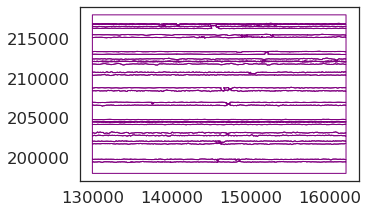

In [98]:
aoi_boundary_HARV.plot(figsize=(5,5), edgecolor="purple", facecolor="None")

In [99]:
aoi_boundary_HARV = gpd.read_file(
  "data/DHMVIIDSMRAS1m_k15/DHMVII_vdc_k15.shp")
aoi_boundary_HARV

,Date,OpnDatum1,OpnDatum2,OpnDatum3,geometry
0,20131202,2013-12-02,None,None,"POLYGON Z ((162000.000 216880.776 0.000, 16198..."
1,20131203,2013-12-03,None,None,"MULTIPOLYGON Z (((150997.353 216693.338 0.000,..."
2,20131211,2013-12-11,None,None,"POLYGON Z ((162000.000 215179.491 0.000, 16200..."
3,20131213,2013-12-13,None,None,"POLYGON Z ((162000.000 213004.450 0.000, 16200..."
4,20131214,2013-12-14,None,None,"MULTIPOLYGON Z (((151802.226 212171.997 0.000,..."
5,20131216,2013-12-16,None,None,"POLYGON Z ((162000.000 211735.009 0.000, 16200..."
6,20131220,2013-12-20,None,None,"POLYGON Z ((162000.000 210423.249 0.000, 16200..."
7,20140110,2014-01-10,None,None,"POLYGON Z ((162000.000 208407.188 0.000, 16200..."
8,20140112,2014-11-12,None,None,"POLYGON Z ((162000.000 206595.626 0.000, 16200..."
9,20140118,2014-01-18,None,None,"MULTIPOLYGON Z (((147423.205 204508.282 0.000,..."


In [100]:
aoi_boundary_HARV.type


0          Polygon
1     MultiPolygon
2          Polygon
3          Polygon
4     MultiPolygon
5          Polygon
6          Polygon
7          Polygon
8          Polygon
9     MultiPolygon
10    MultiPolygon
11         Polygon
12    MultiPolygon
13    MultiPolygon
14         Polygon
15    MultiPolygon
16         Polygon
17    MultiPolygon
18    MultiPolygon
19    MultiPolygon
20         Polygon
21    MultiPolygon
22         Polygon
23         Polygon
24         Polygon
25    MultiPolygon
26    MultiPolygon
27    MultiPolygon
28    MultiPolygon
dtype: object

In [101]:
aoi_boundary_HARV.crs


<Projected CRS: PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["B ...>
Name: Belge 1972 / Belgian Lambert 72
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [102]:
aoi_boundary_HARV.bounds


,minx,miny,maxx,maxy
0,130000.000000,216732.670105,162000.000000,218000.000000
1,130000.000000,215309.060120,162000.000000,216717.100098
2,130000.000000,213267.500122,162000.000000,215285.430115
3,130000.000000,212201.690125,162000.000000,213262.970093
4,130000.000000,201899.400085,162000.000000,212231.090088
5,130000.000000,210579.561707,162000.000000,211889.160095
6,130000.000000,208418.710083,162000.000000,210483.129883
7,130000.000000,206757.180115,162000.000000,208571.560120
8,130000.000000,204742.680115,162000.000000,206759.580078
9,130000.000000,204412.189880,161730.768603,204560.660095


In [117]:
import requests
import json
import numpy as np
import pandas as pd

from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

import xarray
import rioxarray

import rasterio as rt
from rasterio.mask import mask

%matplotlib inline
import matplotlib.pyplot as plt
from shapely.geometry.polygon import Polygon

import plotly.graph_objects as go

from typing import Dict 


# we get the projection of the point data from our Canopy Height Model, 
# after examining the pandas DataFrame and seeing that the CRSs are the same
dtm_src = 'data/DHMVIIDTMRAS1m_k15/GeoTIFF/DHMVIIDTMRAS1m_k15.tif'
dtm_img = rt.open(dtm_src)
dtm_array = dtm_img.read()
# Get DSM data
dsm_src = 'data/DHMVIIDSMRAS1m_k15/GeoTIFF/DHMVIIDSMRAS1m_k15.tif'
dsm_img = rt.open(dsm_src)
#show(dsm_img)
dsm_array = dsm_img.read()
CHM_HARV = dsm_array - dtm_array

data = requests.get(f"https://loc.geopunt.be/v4/Location?q={address}").json()
#    print(data,"\n")
info = {'address' : address, 
                'x_value' : data['LocationResult'][0]['Location']['X_Lambert72'],
                'y_value' : data['LocationResult'][0]['Location']['Y_Lambert72'],
                'street' : data['LocationResult'][0]['Thoroughfarename'],
                'house_number' : data['LocationResult'][0]['Housenumber'], 
                'postcode': data['LocationResult'][0]['Zipcode'], 
                'municipality' : data['LocationResult'][0]['Municipality']}

detail = requests.get("https://api.basisregisters.vlaanderen.be/v1/adresmatch", 
                          params={"postcode": info['postcode'], 
                                  "straatnaam": info['street'],
                                  "huisnummer": info['house_number']}).json()
building = requests.get(detail['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
build = requests.get(building['gebouw']['detail']).json()
info['polygon'] = [build['geometriePolygoon']['polygon']]

# get the polygon coordinates in a x and a y list
poly = address_info["polygon"]
coords = poly[0]["coordinates"]

x_arr = []
y_arr = []

for i in range(len(coords)):
    lst = coords[i]

for j in range(len(lst)):
    x_arr.append(lst[j][0])
    y_arr.append(lst[j][1])

x_arr = np.array(x_arr)
y_arr = np.array(y_arr)

print("x: ", x_arr)
print("y: ", y_arr)  



#CHM_HARV = rioxarray.open("data/DHMVIIDSMRAS1m_k15/GeoTIFF/DHMVIIDSMRAS1m_k15.tif")

# plotting locations in CRS coordinates using CHM_HARV's CRS
# plot_locations_HARV = pd.read_csv("data/NEON-DS-Site-Layout-Files/HARV/HARV_PlotLocations.csv")

plot_locations_HARV = building
plot_locations_HARV = gpd.GeoDataFrame(plot_locations_HARV, 
                    geometry=gpd.points_from_xy(x_arr, y_arr), 
                    crs=CHM_HARV)


x:  [154979.7968787  154975.09499069 154964.84225468 154968.20116669
 154968.62727869 154969.22977469 154979.7968787 ]
y:  [207171.4669618  207174.41300981 207161.9042098  207158.7290418
 207159.1468338  207158.6760498  207171.4669618 ]


ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

In [29]:
dsm_pre_arr = rxr.open_rasterio(dem_pre_path)
cropped_img = dsm_pre_arr[:, 17500:20000, 17500:20000]

cropped_img.plot()
plt.show()



AttributeError: 'DataFrame' object has no attribute 'description'

In [27]:
print(x_arr.min())
print(int(aoi_boundary_HARV.bounds[0].min()))
print(x_arr.max())

print(y_arr.min())

print(y_arr.max())

yAbsB = y_

154964.84225468338


KeyError: 0

In [16]:
# get the max and min coordinates from the polygon for 
# in order to calculate the relative coordinates for the box

xLeft = int(x_arr.min()- int(aoi_boundary_HARV.bounds[0])
yBottom =  int(aoi_boundary_HARV.bounds[1]) - int(y_arr.min)
xRight = int(x_arr.max() - int(aoi_boundary_HARV.bounds[2])
yTop = int(y_arr.max() - int(aoi_boundary_HARV.bounds[3])
print(xLeft, yBottom, xRight, yTop)

SyntaxError: invalid syntax (<ipython-input-16-3fdb4bf1e4ef>, line 5)

In [60]:
# View the Coordinate Reference System (CRS) & spatial extent
print("The CRS for this data is:", dsm_pre_arr.rio.crs)
print("The spatial extent is:", dsm_pre_arr.rio.bounds())


The CRS for this data is: EPSG:31370
The spatial extent is: (130000.0, 198000.0, 162000.0, 218000.0)


In [ ]:
print("The no data value is:", dsm_pre_arr.rio.nodata)

In [22]:
""" position a slice on the map to reduce data """

' position a slice on the map to reduce data '

In [ ]:
""" make a function to search the right file """